# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kulhudhuffushi
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | rundu
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | veseloyarsk
Processing Record 9 of Set 1 | zhigansk
Processing Record 10 of Set 1 | alyangula
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | monastyrshchina
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | pingzhuang
Processing Record 18 of Set 1 | mudgee
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | polyarnyy
Processing Record 21 of Set 1 | cape town

Processing Record 36 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 37 of Set 4 | grand gaube
Processing Record 38 of Set 4 | kruisfontein
Processing Record 39 of Set 4 | sataua
City not found. Skipping...
Processing Record 40 of Set 4 | baijiantan
Processing Record 41 of Set 4 | nouadhibou
Processing Record 42 of Set 4 | junnar
Processing Record 43 of Set 4 | mondovi
Processing Record 44 of Set 4 | redlands
Processing Record 45 of Set 4 | okhotsk
Processing Record 46 of Set 4 | letlhakane
Processing Record 47 of Set 4 | chiriqui grande
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | asfi
Processing Record 1 of Set 5 | saint-francois
Processing Record 2 of Set 5 | dakar
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | farmington
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | satitoa
City not found. Skipping...
Processing Record 7 of Set 5 | blackwater
Pr

Processing Record 30 of Set 8 | ayagoz
Processing Record 31 of Set 8 | shanghai
Processing Record 32 of Set 8 | buala
Processing Record 33 of Set 8 | stoughton
Processing Record 34 of Set 8 | lethem
Processing Record 35 of Set 8 | trincomalee
Processing Record 36 of Set 8 | lufilufi
Processing Record 37 of Set 8 | nichinan
Processing Record 38 of Set 8 | mbulu
Processing Record 39 of Set 8 | maromitsa
Processing Record 40 of Set 8 | seredeyskiy
Processing Record 41 of Set 8 | churapcha
Processing Record 42 of Set 8 | port hardy
Processing Record 43 of Set 8 | batagay-alyta
Processing Record 44 of Set 8 | maniitsoq
Processing Record 45 of Set 8 | tendukheda
Processing Record 46 of Set 8 | hirara
Processing Record 47 of Set 8 | road town
Processing Record 48 of Set 8 | valley city
Processing Record 49 of Set 8 | homer
Processing Record 0 of Set 9 | umm durman
City not found. Skipping...
Processing Record 1 of Set 9 | dindori
Processing Record 2 of Set 9 | lorengau
Processing Record 3 of 

Processing Record 19 of Set 12 | alofi
Processing Record 20 of Set 12 | ballina
Processing Record 21 of Set 12 | ilka
City not found. Skipping...
Processing Record 22 of Set 12 | lowicz
Processing Record 23 of Set 12 | osoyoos
Processing Record 24 of Set 12 | pirmasens
Processing Record 25 of Set 12 | buckeye
Processing Record 26 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 27 of Set 12 | kargasok
Processing Record 28 of Set 12 | chimoio
Processing Record 29 of Set 12 | arnedo
Processing Record 30 of Set 12 | baillif
Processing Record 31 of Set 12 | cascais
Processing Record 32 of Set 12 | akyab
Processing Record 33 of Set 12 | pocoes
Processing Record 34 of Set 12 | los llanos de aridane
Processing Record 35 of Set 12 | port hedland
Processing Record 36 of Set 12 | yirol
City not found. Skipping...
Processing Record 37 of Set 12 | nemuro
Processing Record 38 of Set 12 | wanning
Processing Record 39 of Set 12 | jorochito
Processing Record 40 of Set 12 | nuuk
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_df["Lat"]
max_temp = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

# Export the City_Data into a csv
city_df.to_csv(index_label = "City_ID")

# Show Record Count
city_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [9]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kulhudhuffushi,6.62,73.07,84.94,72,100,6.78,MV,1588924983
1,punta arenas,-53.15,-70.92,35.60,100,13,5.73,CL,1588924800
2,yellowknife,62.46,-114.35,37.99,74,40,5.75,CA,1588924984
3,albany,42.60,-73.97,42.01,68,6,5.70,US,1588924984
4,rundu,-17.93,19.77,59.00,44,0,14.99,NA,1588924984


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

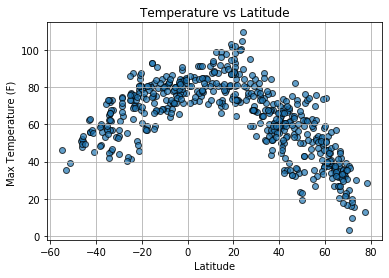

In [25]:
plt.scatter(lats, max_temp, marker="o", edgecolors="black", alpha=0.7)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F) ")
plt.title("Temperature vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("temp.png")

plt.show()

#### Latitude vs. Humidity Plot

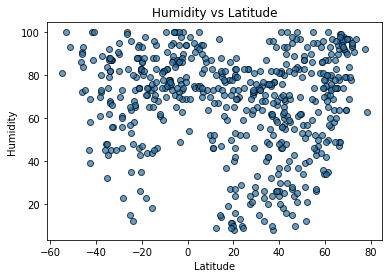

In [26]:
plt.scatter(lats, humidity, marker="o", edgecolors="black", alpha=0.7)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")

plt.show()

#### Latitude vs. Cloudiness Plot

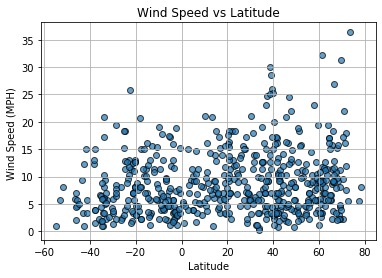

In [27]:
plt.scatter(lats, wind_speed, marker="o", edgecolor="black", alpha=0.7)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH) ")
plt.title("Wind Speed vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windspeed.png")


plt.show()

#### Latitude vs. Wind Speed Plot

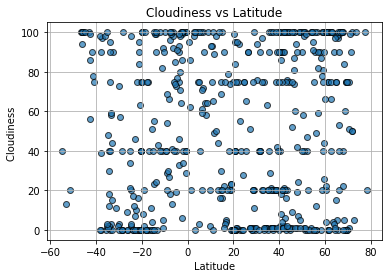

In [28]:
plt.scatter(lats, cloudiness, marker="o", edgecolors="black", alpha=0.7)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")
plt.title("Cloudiness vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cloudiness.png")


plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


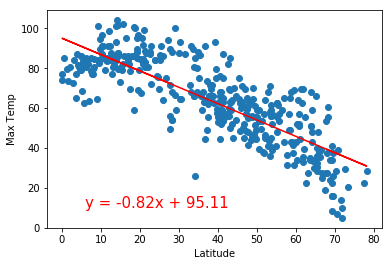

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


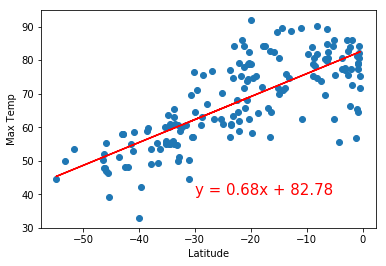

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


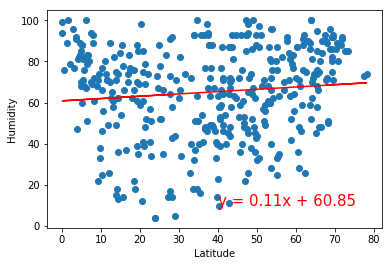

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


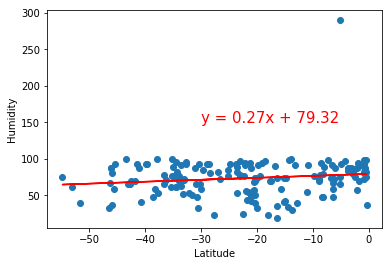

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


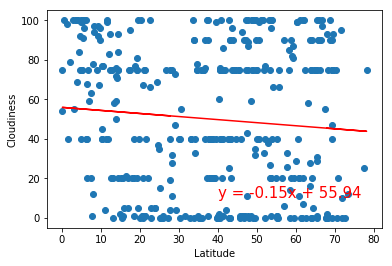

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


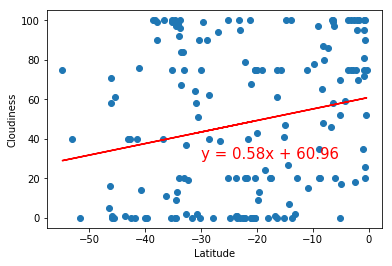

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


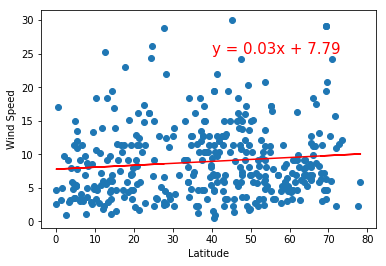

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


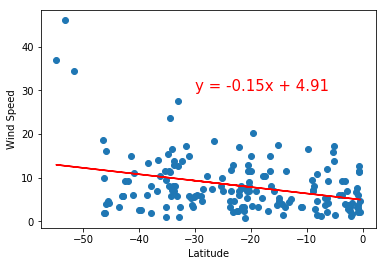